In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
pwd

'C:\\Users\\Ramadhoni\\Documents\\Bootcamp Data Scientist\\Machine Learning'

In [3]:
df = pd.read_csv(r"C:\Users\Ramadhoni\Documents\Bootcamp Data Scientist\Machine Learning\E-commerce_data_clean.csv")

In [5]:
df.head()

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
1,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
3,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
4,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34


In [6]:
df['Months'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

### 1. Which Months generate the highest Order and Revenue?

In [7]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    print(f'Number of orders in month {i} is',df[df['Months']==i]['InvoiceNo'].nunique())

Number of orders in month 1 is 1236
Number of orders in month 2 is 1202
Number of orders in month 3 is 1619
Number of orders in month 4 is 1384
Number of orders in month 5 is 1849
Number of orders in month 6 is 1707
Number of orders in month 7 is 1593
Number of orders in month 8 is 1544
Number of orders in month 9 is 2078
Number of orders in month 10 is 2263
Number of orders in month 11 is 3086
Number of orders in month 12 is 2629


In [8]:
order = np.array(df.groupby('InvoiceNo')['Months'].unique().value_counts().sort_index())
revenue = df.groupby('Months')['TotalCost'].sum().reset_index()
highest_data = revenue
highest_data['Order'] = order
highest_data_sort = highest_data.sort_values(['TotalCost','Order'], ascending = False)
month_highest = highest_data_sort.iloc[0,0]
print(highest_data_sort)
print(f'Months generate the highest Order and Revenue is {month_highest}')

    Months    TotalCost  Order
10      11  1132407.740   3086
9       10   974603.590   2263
8        9   931440.372   2078
11      12   897110.400   2629
4        5   648251.080   1849
7        8   616368.000   1544
5        6   608013.160   1707
2        3   579964.610   1619
6        7   574238.481   1593
0        1   475074.380   1236
1        2   436546.150   1202
3        4   426047.851   1384
Months generate the highest Order and Revenue is 11


In [9]:
highest_data

,Months,TotalCost,Order
0,1,475074.380,1236
1,2,436546.150,1202
2,3,579964.610,1619
3,4,426047.851,1384
4,5,648251.080,1849
5,6,608013.160,1707
6,7,574238.481,1593
7,8,616368.000,1544
8,9,931440.372,2078
9,10,974603.590,2263


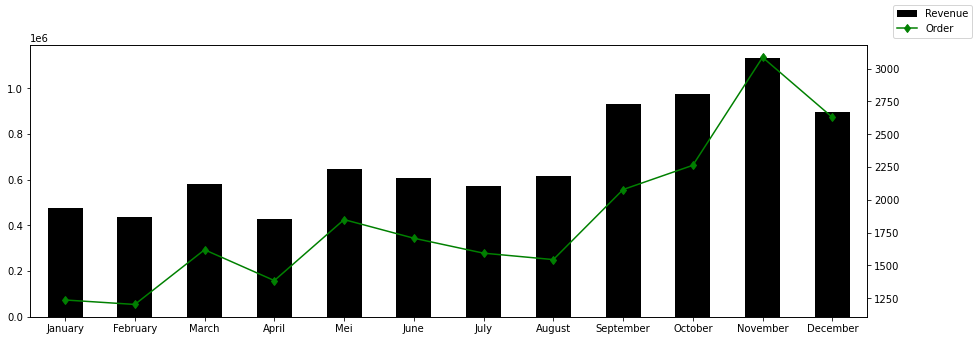

In [10]:
fig, ax1 = plt.subplots(figsize=(15, 5))
ax1= highest_data['TotalCost'].plot(kind = 'bar',color='black',label='Revenue')
ax2= highest_data['Order'].plot(kind='line', marker='d', color = 'green',secondary_y=True, label = 'Order')
ax1.set_xticklabels(('January','February','March','April','Mei','June','July',
                    'August','September','October','November','December'), rotation='horizontal', fontsize=10)

fig.legend()

### 2. Which Day of a week generate the highest Order and Revenue?

In [11]:
days = df['Days'].unique()
days

array([3, 4, 5, 7, 1, 2], dtype=int64)

In [12]:
for i in days:
    print(f'Total Order generate in day {i} is', df[df['Days']==i]['InvoiceNo'].nunique())

Total Order generate in day 3 is 4110
Total Order generate in day 4 is 4978
Total Order generate in day 5 is 3356
Total Order generate in day 7 is 2342
Total Order generate in day 1 is 3512
Total Order generate in day 2 is 3892


In [13]:
for i in days:
    print(f'Total Order generate in day {i} is', df[df['Days']==i]['TotalCost'].sum())

Total Order generate in day 3 is 1530477.4899999998
Total Order generate in day 4 is 1906108.19
Total Order generate in day 5 is 1241316.181
Total Order generate in day 7 is 784418.851
Total Order generate in day 1 is 1274551.511
Total Order generate in day 2 is 1563193.591


In [14]:
order_day = np.array(df.groupby('Days')['InvoiceNo'].nunique())
revenue_day = df.groupby('Days')['TotalCost'].sum().reset_index()
revenue_day['Order'] = order_day
highest_day = revenue_day.copy()
highest_day_sort = highest_day.sort_values(['TotalCost','Order'], ascending= False)

In [15]:
print(highest_day_sort)
print('Day generate the highest Revenue and Order is',highest_day_sort.iloc[0,0])

   Days    TotalCost  Order
3     4  1906108.190   4978
1     2  1563193.591   3892
2     3  1530477.490   4110
0     1  1274551.511   3512
4     5  1241316.181   3356
5     7   784418.851   2342
Day generate the highest Revenue and Order is 4


In [16]:
highest_day

,Days,TotalCost,Order
0,1,1274551.511,3512
1,2,1563193.591,3892
2,3,1530477.490,4110
3,4,1906108.190,4978
4,5,1241316.181,3356
5,7,784418.851,2342


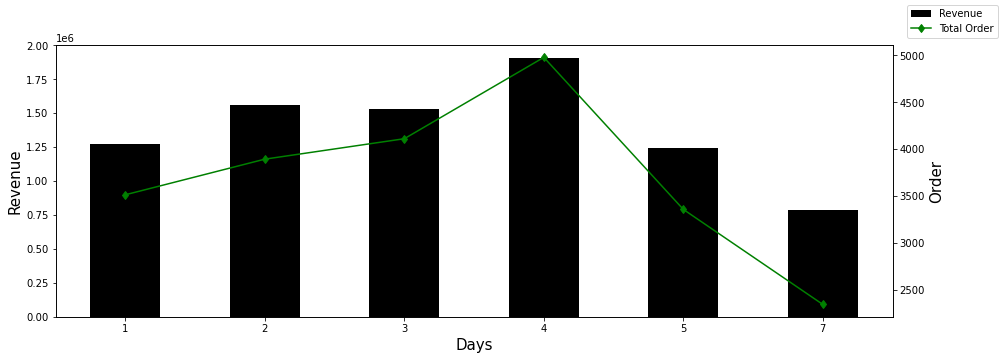

In [17]:
fig,ax1 = plt.subplots(figsize= (15,5))
ax1 = highest_day['TotalCost'].plot(kind = 'bar', color = 'black', label= 'Revenue')
ax2 = highest_day['Order'].plot(kind='line', marker = 'd',color = 'green',secondary_y = True, label = 'Total Order')
ax1.set_xlabel('Days', fontsize = 15)
ax1.set_ylabel('Revenue', fontsize = 15)
ax2.set_ylabel('Order', fontsize = 15)
ax1.set_xticklabels(('1','2','3','4','5','7'), rotation = 'horizontal', fontsize= 10)
fig.legend()

### 3. Which hour the most Order are made?

In [18]:
df.head()

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
1,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
3,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
4,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34


In [19]:
hours = df['Hours'].unique()
hours.sort()
hours

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      dtype=int64)

In [20]:
for i in hours:
    print(f'Total Order generate at {i} is', df[df['Hours']==i]['InvoiceNo'].nunique())

Total Order generate at 6 is 22
Total Order generate at 7 is 31
Total Order generate at 8 is 608
Total Order generate at 9 is 1622
Total Order generate at 10 is 2613
Total Order generate at 11 is 2770
Total Order generate at 12 is 3597
Total Order generate at 13 is 3043
Total Order generate at 14 is 2645
Total Order generate at 15 is 2405
Total Order generate at 16 is 1491
Total Order generate at 17 is 842
Total Order generate at 18 is 257
Total Order generate at 19 is 217
Total Order generate at 20 is 28


In [21]:
df.groupby('Hours')['InvoiceNo'].nunique()
highest_hours = pd.DataFrame(df.groupby('Hours')['InvoiceNo'].nunique().reset_index())
new_highest_hours = highest_hours.rename(columns={'InvoiceNo': 'Total_Orders'})
new_highest_hours

,Hours,Total_Orders
0,6,22
1,7,31
2,8,608
3,9,1622
4,10,2613
5,11,2770
6,12,3597
7,13,3043
8,14,2645
9,15,2405


In [22]:
new_highest_hours_sort = new_highest_hours.sort_values(by= 'Total_Orders', ascending= False)
print(new_highest_hours_sort)
print('The highest Total Orders is at {} with total orders {}'.format(new_highest_hours_sort.iloc[0,0], new_highest_hours_sort.iloc[0,1]))

    Hours  Total_Orders
6      12          3597
7      13          3043
5      11          2770
8      14          2645
4      10          2613
9      15          2405
3       9          1622
10     16          1491
11     17           842
2       8           608
12     18           257
13     19           217
1       7            31
14     20            28
0       6            22
The highest Total Orders is at 12 with total orders 3597


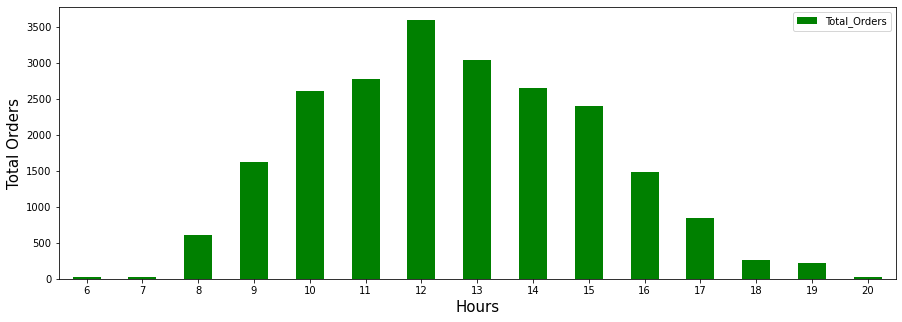

In [23]:
ax,fig = plt.subplots(figsize=(15,5))
ax = new_highest_hours['Total_Orders'].plot(kind='bar',color = 'green', label = 'Total_Orders')
ax.set_ylabel('Total Orders', fontsize= 15)
ax.set_xlabel('Hours', fontsize= 15)
ax.set_xticklabels((hours),rotation= 'horizontal', fontsize=10)
fig.legend()

### 4. Which Date contributes the highest revenue?

In [24]:
df.head()

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
1,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
3,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
4,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34


In [25]:
dates = df['DayOfMonth'].unique()
dates.sort()
dates

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [26]:
for i in dates:
    print(f'Total Revenue generate date {i} is', df[df['DayOfMonth']==i]['TotalCost'].sum())

Total Revenue generate date 1 is 281100.25
Total Revenue generate date 2 is 252279.92
Total Revenue generate date 3 is 263596.02
Total Revenue generate date 4 is 311271.95
Total Revenue generate date 5 is 347762.08999999997
Total Revenue generate date 6 is 321291.45
Total Revenue generate date 7 is 368872.92000000004
Total Revenue generate date 8 is 286675.93000000005
Total Revenue generate date 9 is 283259.39
Total Revenue generate date 10 is 272696.74
Total Revenue generate date 11 is 322661.76
Total Revenue generate date 12 is 215232.09000000003
Total Revenue generate date 13 is 247668.46000000002
Total Revenue generate date 14 is 328783.64
Total Revenue generate date 15 is 298797.411
Total Revenue generate date 16 is 274214.39
Total Revenue generate date 17 is 320885.94
Total Revenue generate date 18 is 253155.28000000003
Total Revenue generate date 19 is 239684.56
Total Revenue generate date 20 is 352782.98000000004
Total Revenue generate date 21 is 315354.78
Total Revenue generat

In [27]:
highest_date = pd.DataFrame(df.groupby('DayOfMonth')['TotalCost'].sum().reset_index())

In [28]:
new_highest_date = highest_date.rename(columns={'DayOfMonth': 'Date', 'TotalCost' :'Revenue'})
new_highest_date

,Date,Revenue
0,1,281100.250
1,2,252279.920
2,3,263596.020
3,4,311271.950
4,5,347762.090
5,6,321291.450
6,7,368872.920
7,8,286675.930
8,9,283259.390
9,10,272696.740


In [29]:
highest_date_sort = new_highest_date.sort_values(by='Revenue', ascending = False)
print(highest_date_sort)
print('Date contributes the highest revenue is {} with total Revenue {}'.format(highest_date_sort.iloc[0,0],highest_date_sort.iloc[0,1]))

    Date     Revenue
6      7  368872.920
19    20  352782.980
4      5  347762.090
13    14  328783.640
10    11  322661.760
5      6  321291.450
16    17  320885.940
20    21  315354.780
3      4  311271.950
14    15  298797.411
27    28  290245.740
7      8  286675.930
8      9  283259.390
0      1  281100.250
15    16  274214.390
9     10  272696.740
2      3  263596.020
23    24  255024.780
17    18  253155.280
1      2  252279.920
12    13  247668.460
21    22  245162.670
22    23  240883.950
18    19  239684.560
24    25  222502.991
11    12  215232.090
26    27  210198.870
29    30  199771.770
25    26  180661.462
28    29  163287.730
30    31  134297.900
Date contributes the highest revenue is 7 with total Revenue 368872.92000000284


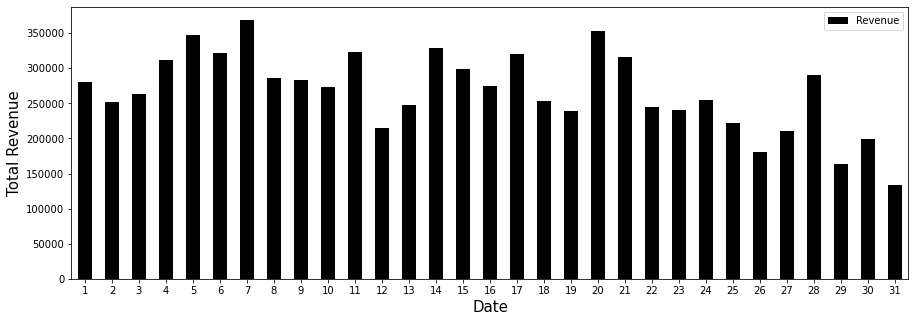

In [30]:
ax, fig = plt.subplots(figsize= (15,5))
ax = new_highest_date['Revenue'].plot(kind='bar', color= 'black', label = 'Revenue')
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Total Revenue', fontsize = 15)
ax.set_xticklabels((dates),rotation= 'horizontal', fontsize=10)
fig.legend()
plt.show()

 ### 5. How does each country contributes to the revenue? is there any patterns?

In [31]:
df.head()
df.groupby('Country')['TotalCost'].sum()
country_revenue = pd.DataFrame(df.groupby('Country')['TotalCost'].sum())
new_country_revenue = country_revenue.rename(columns = {'TotalCost': 'Revenue'})
new_country_revenue

,Revenue
Country,
Australia,1.370773e+05
Austria,1.015432e+04
Bahrain,5.484000e+02
Belgium,4.091096e+04
Brazil,1.143600e+03
Canada,3.666380e+03
Channel Islands,2.008629e+04
Cyprus,1.294629e+04
Czech Republic,7.077200e+02


In [32]:
new_country_revenue['Percentage'] = (new_country_revenue['Revenue']/new_country_revenue['Revenue'].sum())*100
new_country_revenue['Percentage'].sum()
new_country_revenue

,Revenue,Percentage
Country,,
Australia,1.370773e+05,1.651520
Austria,1.015432e+04,0.122340
Bahrain,5.484000e+02,0.006607
Belgium,4.091096e+04,0.492899
Brazil,1.143600e+03,0.013778
Canada,3.666380e+03,0.044173
Channel Islands,2.008629e+04,0.242002
Cyprus,1.294629e+04,0.155978
Czech Republic,7.077200e+02,0.008527


In [33]:
new_country_revenue_sort = new_country_revenue.sort_values('Percentage', ascending= False)
top5= new_country_revenue_sort.head(5)
top5

,Revenue,Percentage
Country,,
United Kingdom,6.767873e+06,81.539997
Netherlands,2.846615e+05,3.429630
EIRE,2.502852e+05,3.015461
Germany,2.216982e+05,2.671042
France,1.967128e+05,2.370015


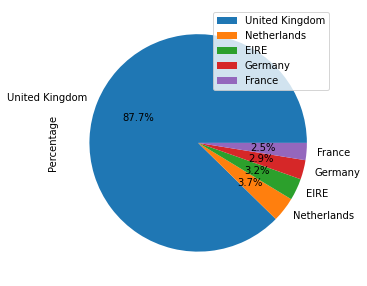

In [48]:
plot = top5.plot.pie(y='Percentage', figsize=(5, 5), autopct='%1.1f%%')

### 6. How does the Discount influence the business performance?

In [6]:
months = df['Months'].unique()
months.sort()

In [15]:
df.head()
df[df['StockCode']=='D']

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost
141,C536379,2010-12-01 09:41:00,2010-12-01,2010,12,3,9,1,D,Discount,-1,27.50,14527,United Kingdom,-27.50
6748,C537164,2010-12-05 13:21:00,2010-12-05,2010,12,7,13,5,D,Discount,-1,29.29,14527,United Kingdom,-29.29
10234,C537597,2010-12-07 12:34:00,2010-12-07,2010,12,2,12,7,D,Discount,-1,281.00,15498,United Kingdom,-281.00
12760,C537857,2010-12-08 16:00:00,2010-12-08,2010,12,3,16,8,D,Discount,-1,267.12,17340,United Kingdom,-267.12
20712,C538897,2010-12-15 09:14:00,2010-12-15,2010,12,3,9,15,D,Discount,-1,5.76,16422,United Kingdom,-5.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361537,C577227,2011-11-18 12:06:00,2011-11-18,2011,11,5,12,18,D,Discount,-1,19.82,14527,United Kingdom,-19.82
361538,C577227,2011-11-18 12:06:00,2011-11-18,2011,11,5,12,18,D,Discount,-1,16.76,14527,United Kingdom,-16.76
372543,C578239,2011-11-23 12:29:00,2011-11-23,2011,11,3,12,23,D,Discount,-1,26.33,14912,Italy,-26.33
389005,C579884,2011-11-30 17:34:00,2011-11-30,2011,11,3,17,30,D,Discount,-1,20.53,14527,United Kingdom,-20.53


In [7]:
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [56]:
month_revenue = []
for i in months:
    month_revenue.append(df[df['Months']==i]['TotalCost'].sum())
    
order_months = []
for i in months:
    order_months.append(df[df['Months']==i]['InvoiceNo'].nunique())

total_month_discount= []
for i in months:
    total_month_discount.append(df[(df['Months']==i)& (df['StockCode']=='D')]['StockCode'].count())

In [57]:
order_months

[1236, 1202, 1619, 1384, 1849, 1707, 1593, 1544, 2078, 2263, 3086, 2629]

In [50]:
total_month_discount

[1, 4, 5, 3, 7, 7, 5, 14, 7, 3, 12, 9]

In [68]:
discount_df = pd.DataFrame({'months' : months, 'month_revenue' : month_revenue,'orders':order_months, 'total_month_discount' : total_month_discount})

In [73]:
discount_df

,months,month_revenue,orders,total_month_discount
0,1,475074.380,1236,1
1,2,436546.150,1202,4
2,3,579964.610,1619,5
3,4,426047.851,1384,3
4,5,648251.080,1849,7
5,6,608013.160,1707,7
6,7,574238.481,1593,5
7,8,616368.000,1544,14
8,9,931440.372,2078,7
9,10,974603.590,2263,3


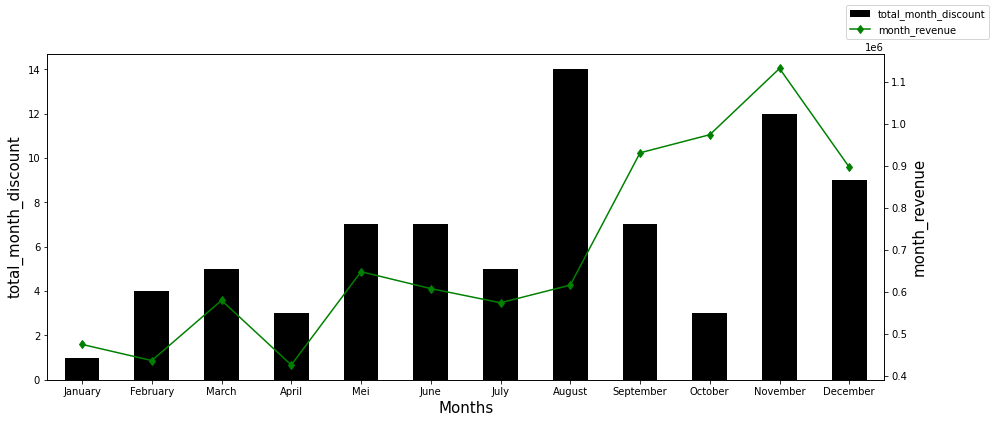

In [96]:
fig, ax1 = plt.subplots(figsize=(15, 5))
ax1 = discount_df['total_month_discount'].plot(kind='bar', color='black', label='total_month_discount')
ax2 = discount_df['month_revenue'].plot(kind='line', marker='d', secondary_y=True, color = 'green',label = 'month_revenue')
ax1.set_xlabel('Months',fontsize=15)
ax1.set_ylabel('total_month_discount',fontsize=15)
ax2.set_ylabel('month_revenue',fontsize=15)
ax1.set_xticklabels(('January','February','March','April','Mei','June','July',
                    'August','September','October','November','December'))
fig.legend()
plt.show()

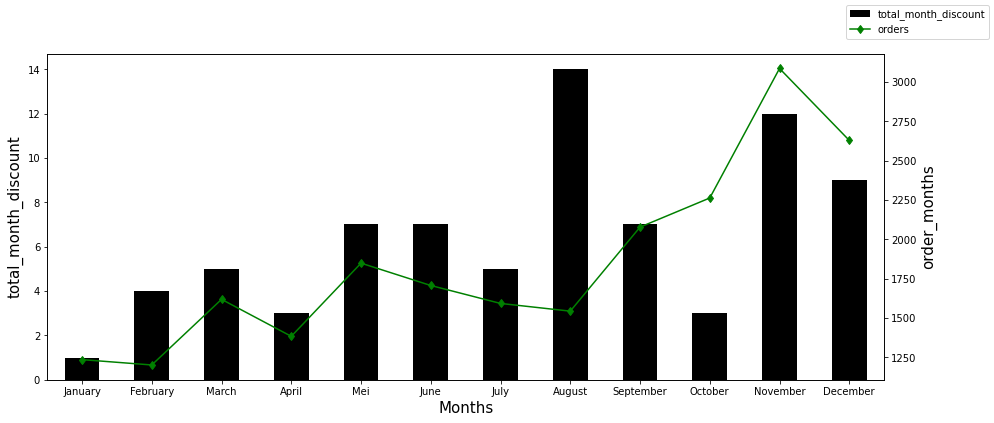

In [99]:
fig, ax1 = plt.subplots(figsize=(15, 5))
ax1 = discount_df['total_month_discount'].plot(kind='bar', color='black', label='total_month_discount')
ax2 = discount_df['orders'].plot(kind='line', marker='d', secondary_y=True, color = 'green',label = 'orders')
ax1.set_xlabel('Months',fontsize=15)
ax1.set_ylabel('total_month_discount',fontsize=15)
ax2.set_ylabel('order_months',fontsize=15)
ax1.set_xticklabels(('January','February','March','April','Mei','June','July',
                    'August','September','October','November','December'))
fig.legend()
plt.show()

In [97]:
discount_df.corr()

,months,month_revenue,orders,total_month_discount
months,1.000000,0.869087,0.863908,0.613605
month_revenue,0.869087,1.000000,0.946853,0.466107
orders,0.863908,0.946853,1.000000,0.518349
total_month_discount,0.613605,0.466107,0.518349,1.000000
